In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#loading_dataset
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0 #normalization

4422102/4422102 [==============================] - 0s 0us/step


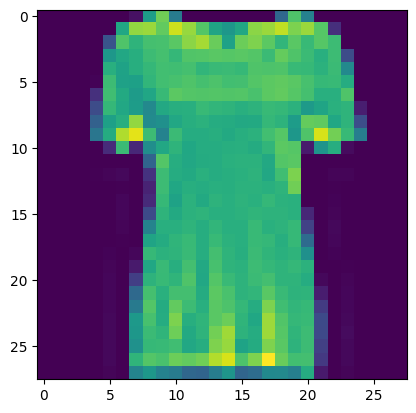

In [3]:
#image_Display
import matplotlib.pyplot as plt
plt.imshow(x_train[10])

In [4]:
y_train[10]

0

In [5]:
model=keras.Sequential([layers.Flatten(input_shape=(28,28,1)),
                        layers.Dense(128,activation='relu'),
                        layers.Dense(64,activation='relu'),
                        layers.Dense(64,activation='relu'),
                        layers.Dense(10,activation='softmax')])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
n=model.fit(x_train,y_train,validation_split=0.1,epochs=15)

Epoch 1/15
1688/1688 [==============================] - 25s 13ms/step - loss: 0.5137 - accuracy: 0.8166 - val_loss: 0.4128 - val_accuracy: 0.8463
Epoch 2/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.3769 - accuracy: 0.8624 - val_loss: 0.3637 - val_accuracy: 0.8643
Epoch 3/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.3372 - accuracy: 0.8761 - val_loss: 0.3641 - val_accuracy: 0.8633
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3156 - accuracy: 0.8832 - val_loss: 0.4044 - val_accuracy: 0.8542
Epoch 5/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3012 - accuracy: 0.8880 - val_loss: 0.3652 - val_accuracy: 0.8657
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2819 - accuracy: 0.8945 - val_loss: 0.3301 - val_accuracy: 0.8837
Epoch 7/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2733 - accuracy: 0.8985 - val_loss: 0.3329 - val_accur

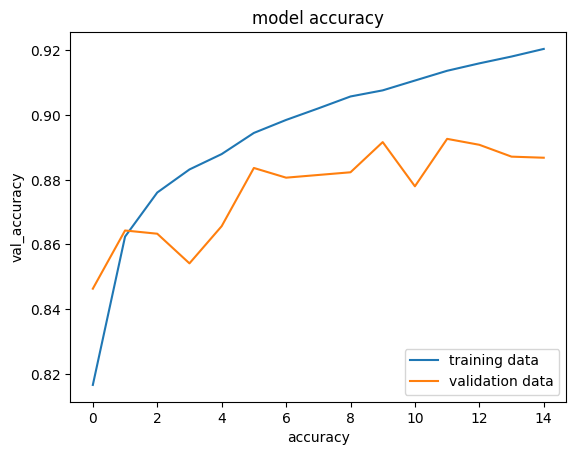

In [8]:
#model_accuracy
plt.plot(n.history['accuracy'])
plt.plot(n.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.legend(['training data','validation data'],loc='lower right')
plt.show()

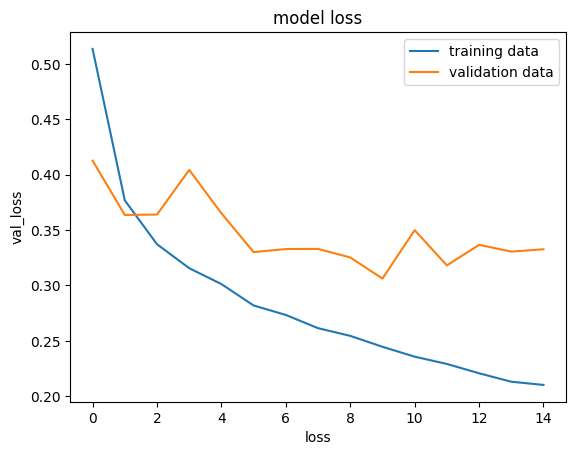

In [9]:
#model_loss
plt.plot(n.history['loss'])
plt.plot(n.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend(['training data','validation data'],loc='upper right')
plt.show()

In [10]:
y_pred=model.predict(x_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[2.1004134e-05, 1.8658202e-04, 1.3128267e-05, ..., 8.3889524e-03,
        5.2431398e-07, 9.4777000e-01],
       [2.6399703e-04, 6.7434131e-19, 9.9794108e-01, ..., 3.4551092e-18,
        3.4135611e-10, 3.4463063e-16],
       [4.1747467e-16, 9.9999994e-01, 3.5236565e-21, ..., 1.2855334e-32,
        1.0427255e-18, 5.1327531e-24],
       ...,
       [8.1335678e-08, 9.3844485e-13, 2.2552566e-08, ..., 7.2029649e-14,
        9.9999923e-01, 2.3827162e-12],
       [2.7900291e-12, 9.9999994e-01, 4.6032530e-16, ..., 1.2348737e-21,
        1.1751855e-12, 1.5878710e-16],
       [4.1307544e-08, 2.1028555e-13, 7.8974685e-09, ..., 1.4316169e-07,
        5.9838590e-06, 2.5533780e-08]], dtype=float32)

In [11]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [12]:
from sklearn.metrics import accuracy_score
#accuracy_score
accuracy_score(y_pred,y_test)

0.8823

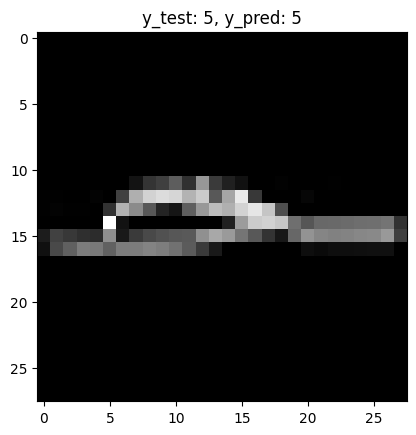

In [13]:
#classifying_product
plt.imshow(x_test[8],cmap='gray')
plt.title(f'y_test: {y_test[8]}, y_pred: {y_pred[8]}')
plt.show()